In [559]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [560]:
# Максимальное количество слов 
num_words = 100
# Максимальная длина комментария
max_comment_len = 11

In [23]:
data_x = files.upload()

Saving asd.csv to asd (2).csv


In [561]:
train = pd.read_csv('asd (2).csv')

In [347]:
train

,Возраст,Пол,Национальность,Автомобиль,Велосипед,ПК,Телевизор,Дача,Квартира,Гараж,Вес,Рост,рост/вес,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0,54,М,Русские,1,1,1,1,1,1,0,86,"170,6","1,98372093023256",0,0,0,0,0
1,69,Ж,Русские,0,1,0,0,0,0,0,"83,9",151,"1,79976162097735",1,0,1,0,0
2,55,Ж,Русские,0,1,0,1,1,1,1,"82,4",163,"1,97815533980583",1,0,0,0,0
3,54,Ж,Русские,1,1,1,1,1,0,1,"66,7",157,"2,35382308845577",1,0,0,0,0
4,54,М,Русские,1,1,1,1,1,0,1,"79,1",170,"2,14917825537295",1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,39,Ж,Русские,1,1,1,1,1,1,1,67,173,"2,58208955223881",0,0,0,0,0
1594,59,Ж,Русские,0,0,0,1,1,1,0,"87,1","155,9","1,78989667049369",1,0,0,0,0
1595,68,Ж,Русские,0,0,1,1,1,1,0,"68,6","152,6","2,22448979591837",1,0,0,0,0
1596,69,М,Русские,1,0,1,1,1,0,1,76,172,"2,26315789473684",1,0,0,1,1


In [555]:
!ls

 aaa.csv       'asd (2).csv'   best_model_lstm.h5   zzz.csv
'asd (1).csv'   asd.csv        sample_data


In [562]:
min_old = 99999
for i in range(len(train['Возраст'])):
  if int(train['Возраст'][i]) < min_old:
    min_old = int(train['Возраст'][i])
min_old

35

In [563]:
max_old = 0
for i in range(len(train['Возраст'])):
  if int(train['Возраст'][i]) > max_old and int(train['Возраст'][i]) < 200:
    max_old = int(train['Возраст'][i])
max_old

70

In [564]:
interval_old = int((max_old - min_old)/5)
interval_old

7

In [565]:
min_rost_ves = 99999
for i in range(len(train['рост/вес'])):
  if float(train['рост/вес'][i].replace(',', '.')[0:5]) < min_rost_ves:
    min_rost_ves = float(train['рост/вес'][i].replace(',', '.')[0:5])
min_rost_ves

1.035

In [566]:
max_rost_ves = 0
for i in range(len(train['рост/вес'])):
  if float(train['рост/вес'][i].replace(',', '.')[0:5]) > max_rost_ves:
    max_rost_ves = float(train['рост/вес'][i].replace(',', '.')[0:5])
max_rost_ves

3.695

In [567]:
interval_rost_ves = (max_rost_ves - min_rost_ves)/5
interval_rost_ves

0.532

In [568]:
for i in range(5):
  print( min_old+interval_old*i, min_old+interval_old*(i+1) )

35 42
42 49
49 56
56 63
63 70


In [569]:
for i in range(5):
  print( min_rost_ves+interval_rost_ves*i, min_rost_ves+interval_rost_ves*(i+1) )

1.035 1.567
1.567 2.099
2.099 2.6310000000000002
2.6310000000000002 3.1630000000000003
3.1630000000000003 3.6950000000000003


In [570]:
arr_new = [[],[]]

for i in range(len(train['Возраст'])):
  if min_old+interval_old*0 <= int(train['Возраст'][i]) and int(train['Возраст'][i]) < min_old+interval_old*(0+1):
    arr_new[0].append('35X42')
  if min_old+interval_old*1 <= int(train['Возраст'][i]) and int(train['Возраст'][i]) < min_old+interval_old*(1+1):
    arr_new[0].append('42X49')
  if min_old+interval_old*2 <= int(train['Возраст'][i]) and int(train['Возраст'][i]) < min_old+interval_old*(2+1):
    arr_new[0].append('49X56')
  if min_old+interval_old*3 <= int(train['Возраст'][i]) and int(train['Возраст'][i]) < min_old+interval_old*(3+1):
    arr_new[0].append('56X63')
  if min_old+interval_old*4 <= int(train['Возраст'][i]) and int(train['Возраст'][i]) <= min_old+interval_old*(4+1):
    arr_new[0].append('63X70')
  if min_old+interval_old*0 > int(train['Возраст'][i]) or int(train['Возраст'][i]) > min_old+interval_old*(4+1):
    arr_new[0].append('x')

for i in range(len(train['рост/вес'])):
  if min_rost_ves+interval_rost_ves*0 - 0.5 <= float(train['рост/вес'][i].replace(',', '.')[0:5]) and float(train['рост/вес'][i].replace(',', '.')[0:5]) < min_rost_ves+interval_rost_ves*(0+1):
    arr_new[1].append('1035X1567')
  if min_rost_ves+interval_rost_ves*1 <= float(train['рост/вес'][i].replace(',', '.')[0:5]) and float(train['рост/вес'][i].replace(',', '.')[0:5]) < min_rost_ves+interval_rost_ves*(1+1):
    arr_new[1].append('1567X2099')
  if min_rost_ves+interval_rost_ves*2 <= float(train['рост/вес'][i].replace(',', '.')[0:5]) and float(train['рост/вес'][i].replace(',', '.')[0:5]) < min_rost_ves+interval_rost_ves*(2+1):
    arr_new[1].append('2099X2631')
  if min_rost_ves+interval_rost_ves*3 <= float(train['рост/вес'][i].replace(',', '.')[0:5]) and float(train['рост/вес'][i].replace(',', '.')[0:5]) < min_rost_ves+interval_rost_ves*(3+1):
    arr_new[1].append('2631X3163')
  if min_rost_ves+interval_rost_ves*4 <= float(train['рост/вес'][i].replace(',', '.')[0:5]) and float(train['рост/вес'][i].replace(',', '.')[0:5]) <= min_rost_ves+interval_rost_ves*(4+1) +0.5:
    arr_new[1].append('3163X3695')
  if min_rost_ves+interval_rost_ves*0 - 0.5 > float(train['рост/вес'][i].replace(',', '.')[0:5]) or float(train['рост/вес'][i].replace(',', '.')[0:5]) > min_rost_ves+interval_rost_ves*(4+1) +0.5:
    arr_new[1].append('x')


In [571]:
len(train['Возраст'])

1598

In [572]:
len(arr_new[1])

1598

In [573]:
comments = []
for i in range(len(train['Возраст'])):
  text = ''
  text = text + arr_new[0][i] + ' '
  text = text + arr_new[1][i] + ' '
  
  if train['Пол'][i] == 'М' or train['Пол'][i] == 'Ж':
    text = text + train['Пол'][i] + ' '
  else:
    text = text + 'М '
  text = text + train['Национальность'][i].replace(' ', '') + ' '
  if train['Автомобиль'][i] == 1:
    text = text + 'АвтомобильXда '
  else:
    text = text + 'АвтомобильXнет '
  if train['Велосипед'][i] == 1:
    text = text + 'ВелосипедXда '
  else:
    text = text + 'ВелосипедXнет '
  if train['ПК'][i] == 1:
    text = text + 'ПКXда '
  else:
    text = text + 'ПКXнет '
  if train['Телевизор'][i] == 1:
    text = text + 'ТелевизорXда '
  else:
    text = text + 'ТелевизорXнет '
  if train['Дача'][i] == 1:
    text = text + 'ДачаXда '
  else:
    text = text + 'ДачаXнет '
  if train['Квартира'][i] == 1:
    text = text + 'КвартираXда '
  else:
    text = text + 'КвартираXнет '
  if train['Гараж'][i] == 1:
    text = text + 'ГаражXда'
  else:
    text = text + 'ГаражXнет'

    
  comments.append(text)
  # print(i)
  # if i == 10:
  #   break

comments[:5]

['49X56 1567X2099 М Русские АвтомобильXда ВелосипедXда ПКXда ТелевизорXда ДачаXда КвартираXда ГаражXнет',
 '63X70 1567X2099 Ж Русские АвтомобильXнет ВелосипедXда ПКXнет ТелевизорXнет ДачаXнет КвартираXнет ГаражXнет',
 '49X56 1567X2099 Ж Русские АвтомобильXнет ВелосипедXда ПКXнет ТелевизорXда ДачаXда КвартираXда ГаражXда',
 '49X56 2099X2631 Ж Русские АвтомобильXда ВелосипедXда ПКXда ТелевизорXда ДачаXда КвартираXнет ГаражXда',
 '49X56 2099X2631 М Русские АвтомобильXда ВелосипедXда ПКXда ТелевизорXда ДачаXда КвартираXнет ГаражXда']

In [68]:
# arr_new

Выделяем данные для обучения

In [574]:
y_train = train[['Артериальная гипертензия', 'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',	'Сердечная недостаточность',	'Прочие заболевания сердца']]

In [181]:
# y_test

In [551]:
y_train

,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0,0,0,0,0,0
1,1,0,1,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1493,1,0,0,0,0
1494,0,0,0,0,0
1495,0,0,0,1,0
1496,0,0,0,0,0


## Токенизация текста

In [554]:
comments[:5]

['49X56 1567X2099 М Русские АвтомобильXда ВелосипедXда ПКXда ТелевизорXда ДачаXда КвартираXда ГаражXнет',
 '63X70 1567X2099 Ж Русские АвтомобильXнет ВелосипедXда ПКXнет ТелевизорXнет ДачаXнет КвартираXнет ГаражXнет',
 '49X56 1567X2099 Ж Русские АвтомобильXнет ВелосипедXда ПКXнет ТелевизорXда ДачаXда КвартираXда ГаражXда',
 '49X56 2099X2631 Ж Русские АвтомобильXда ВелосипедXда ПКXда ТелевизорXда ДачаXда КвартираXнет ГаражXда',
 '49X56 2099X2631 М Русские АвтомобильXда ВелосипедXда ПКXда ТелевизорXда ДачаXда КвартираXнет ГаражXда']

In [611]:
import json

In [612]:
with open('comments.json', 'w') as fw:
    # записываем
    json.dump(comments, fw, ensure_ascii=False)

In [621]:
comments = pd.read_json( 'comments.json' )[0]
comments

0       49X56 1567X2099 М Русские АвтомобильXда Велоси...
1       63X70 1567X2099 Ж Русские АвтомобильXнет Велос...
2       49X56 1567X2099 Ж Русские АвтомобильXнет Велос...
3       49X56 2099X2631 Ж Русские АвтомобильXда Велоси...
4       49X56 2099X2631 М Русские АвтомобильXда Велоси...
                              ...                        
1593    35X42 2099X2631 Ж Русские АвтомобильXда Велоси...
1594    56X63 1567X2099 Ж Русские АвтомобильXнет Велос...
1595    63X70 2099X2631 Ж Русские АвтомобильXнет Велос...
1596    63X70 2099X2631 М Русские АвтомобильXда Велоси...
1597    49X56 2099X2631 М Русские АвтомобильXнет Велос...
Name: 0, Length: 1598, dtype: object

In [627]:
from google.colab import files
files.download('comments.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [613]:
!ls

 aaa.csv       'asd (2).csv'   best_model_lstm.h5   sample_data
'asd (1).csv'   asd.csv        comments.json	    zzz.csv


Создаем токенизатор Keras

In [622]:
tokenizer = Tokenizer(num_words=num_words)

In [610]:
# tokenizer.save_to_file('tokenizer')

Обучаем токенизатор на новостях

In [623]:
tokenizer.fit_on_texts(comments)

Просматриваем словарь токенизатора

In [624]:
tokenizer.word_index

{'1035x1567': 26,
 '1567x2099': 11,
 '2099x2631': 15,
 '2631x3163': 25,
 '3163x3695': 28,
 '35x42': 24,
 '42x49': 23,
 '49x56': 22,
 '56x63': 19,
 '63x70': 20,
 'x': 43,
 'автомобильxда': 12,
 'автомобильxнет': 8,
 'азербайджанцы': 32,
 'армяне': 35,
 'башкиры': 45,
 'белорусы': 33,
 'буряты': 46,
 'велосипедxда': 16,
 'велосипедxнет': 5,
 'гаражxда': 14,
 'гаражxнет': 6,
 'дачаxда': 9,
 'дачаxнет': 10,
 'другиенациональности': 34,
 'евреи': 41,
 'ж': 3,
 'казахи': 36,
 'квартираxда': 4,
 'квартираxнет': 17,
 'киргизы': 39,
 'лезгины': 44,
 'м': 18,
 'молдаване': 47,
 'мордва': 38,
 'немцы': 30,
 'пкxда': 7,
 'пкxнет': 13,
 'русские': 1,
 'таджики': 40,
 'татары': 27,
 'телевизорxда': 2,
 'телевизорxнет': 21,
 'удмурты': 37,
 'украинцы': 31,
 'чуваши': 29,
 'эстонцы': 42}

Преобразуем комментарии в числовое представление

In [625]:
sequences = tokenizer.texts_to_sequences(comments)

Просматриваем новости в числовом представлении

In [626]:
index = 1
print(comments[index])
print(sequences[index])

63X70 1567X2099 Ж Русские АвтомобильXнет ВелосипедXда ПКXнет ТелевизорXнет ДачаXнет КвартираXнет ГаражXнет
[20, 11, 3, 1, 8, 16, 13, 21, 10, 17, 6]


Ограничиваем длину отзывов

In [579]:
train = pad_sequences(sequences, maxlen=max_comment_len)
x_train = train

In [580]:
x_train[:5]

array([[22, 11, 18,  1, 12, 16,  7,  2,  9,  4,  6],
       [20, 11,  3,  1,  8, 16, 13, 21, 10, 17,  6],
       [22, 11,  3,  1,  8, 16, 13,  2,  9,  4, 14],
       [22, 15,  3,  1, 12, 16,  7,  2,  9, 17, 14],
       [22, 15, 18,  1, 12, 16,  7,  2,  9, 17, 14]], dtype=int32)

## Cеть LSTM

In [581]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 128, input_length=max_comment_len))
model_lstm.add(SpatialDropout1D(0.5))
model_lstm.add(LSTM(40, return_sequences=True))
model_lstm.add(LSTM(40))
model_lstm.add(Dense(5, activation='sigmoid'))

In [582]:
model_lstm.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', 'AUC'])

In [583]:
model_lstm.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 11, 128)           12800     
_________________________________________________________________
spatial_dropout1d_13 (Spatia (None, 11, 128)           0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 11, 40)            27040     
_________________________________________________________________
lstm_27 (LSTM)               (None, 40)                12960     
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 205       
Total params: 53,005
Trainable params: 53,005
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [584]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [585]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=2,
                              batch_size=8,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/2
176/180 [============================>.] - ETA: 0s - loss: 0.3909 - accuracy: 0.9332 - auc: 0.7425
Epoch 00001: val_accuracy improved from -inf to 0.94375, saving model to best_model_lstm.h5
180/180 [==============================] - 2s 13ms/step - loss: 0.3925 - accuracy: 0.9325 - auc: 0.7441 - val_loss: 0.3916 - val_accuracy: 0.9438 - val_auc: 0.7884
Epoch 2/2
175/180 [============================>.] - ETA: 0s - loss: 0.3437 - accuracy: 0.9364 - auc: 0.8089
Epoch 00002: val_accuracy did not improve from 0.94375
180/180 [==============================] - 1s 8ms/step - loss: 0.3417 - accuracy: 0.9374 - auc: 0.8103 - val_loss: 0.3812 - val_accuracy: 0.9438 - val_auc: 0.8029


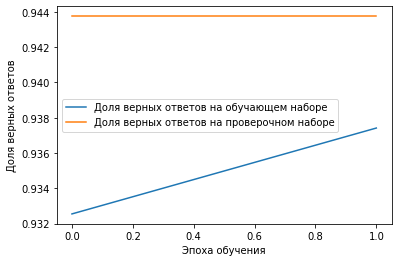

In [586]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## набор данных для тестирования

In [587]:
x_test[:5]

array([[19, 15, 18,  1,  8,  5, 13, 21, 10, 17,  6],
       [23, 15, 18, 27, 12,  5,  7,  2,  9,  4, 14],
       [22, 11, 18,  1, 12,  5,  7,  2,  9,  4, 14],
       [20, 25,  3,  1,  8,  5, 13, 21, 10, 17,  6],
       [23, 15, 18,  1, 12, 16,  7,  2,  9,  4, 14]], dtype=int32)

Правильные ответы

In [291]:
y_test[:10]

,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
1498,0,0,0,0,0
1499,0,0,0,0,0
1500,0,0,0,0,0
1501,0,0,0,0,0
1502,0,0,0,0,1
1503,1,0,0,0,0
1504,0,0,0,0,0
1505,1,0,0,1,1
1506,1,0,0,0,0
1507,0,0,0,0,0


## Оцениваем качество работы сети на тестовом наборе данных

In [598]:
model_lstm.load_weights(model_lstm_save_path)

In [531]:
# model_lstm.evaluate(x_test, y_test, verbose=1)

## Пробуем классифицировать

In [294]:
y_train

,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0,0,0,0,0,0
1,1,0,1,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1493,1,0,0,0,0
1494,0,0,0,0,0
1495,0,0,0,1,0
1496,0,0,0,0,0


In [588]:
comments[1497]

'63X70 2099X2631 Ж Русские АвтомобильXнет ВелосипедXда ПКXнет ТелевизорXда ДачаXда КвартираXда ГаражXда'

In [201]:
  comment = "49X56 1567X2099 М Русские АвтомобильXда ВелосипедXда ПКXда ТелевизорXда ДачаXда КвартираXда ГаражXнет"

In [589]:
sequence = tokenizer.texts_to_sequences([comments[0]])

In [298]:
sequence

[[20, 15, 3, 1, 8, 16, 13, 2, 9, 4, 14]]

In [590]:
data = pad_sequences(sequence, maxlen=max_comment_len)

In [300]:
data

array([[20, 15,  3,  1,  8, 16, 13,  2,  9,  4, 14]], dtype=int32)

In [591]:
result = model_lstm.predict(data)

In [592]:
result

array([[0.21518296, 0.01297851, 0.06649956, 0.03996412, 0.06214627]],
      dtype=float32)

In [600]:
max = 0
min = 99999
for i in range(len(comments)):
  sequence = tokenizer.texts_to_sequences([comments[i]])
  data = pad_sequences(sequence, maxlen=max_comment_len)
  result = model_lstm.predict(data)
  print(i)
  for i in range(5):
    if result[0][i] > max:
      max = result[0][i]
  for i in range(5):
    if result[0][i] < min:
      min = result[0][i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253


KeyboardInterrupt: ignored

In [594]:
min

0.009607266

In [595]:
max

0.7939583

In [417]:
# delta_max = max - 0.50
# delta_min = 0.5 - min

In [602]:
comments[1497]

'63X70 2099X2631 Ж Русские АвтомобильXнет ВелосипедXда ПКXнет ТелевизорXда ДачаXда КвартираXда ГаражXда'

In [599]:
sequence = tokenizer.texts_to_sequences([comments[1497]])
data = pad_sequences(sequence, maxlen=max_comment_len)
result = model_lstm.predict(data)
result

array([[0.59057647, 0.1322412 , 0.24004504, 0.16932808, 0.19525325]],
      dtype=float32)

In [601]:
from google.colab import files
files.download('best_model_lstm.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: ignored

In [522]:

# arr_answ = []
# for i in range(len(result[0])):
#   if result[0][i] >= 0.5:
#     x = (result[0][i] - 0.5)*(0.50/delta_max) + 0.50
#     # (0.50129753 - 0.5)*(0.50/delta_max) + 0.50
#   else:
#     x = (result[0][i] - 0.48756605)*(0.50/delta_min)
#   arr_answ.append(x)
# arr_answ

In [597]:
# arr_answ = []
# for i in range(len(result[0])):
#   arr_answ.append(result[0][i]*2)
# arr_answ

In [637]:
# result[0]

In [635]:
answ = ''
answ = answ + str(result[0][0])[0:5] +' '
answ = answ + str(result[0][1])[0:5] +' '
answ = answ + str(result[0][2])[0:5] +' '
answ = answ + str(result[0][3])[0:5] +' '
answ = answ + str(result[0][4])[0:5]
answ

'0.582 0.189 0.283 0.223 0.239'